In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('economic_csv.csv')
df.head()

,Year,Month,Interest_Rate,Unemployment_Rate,Index_Price
0,2006,1,9.54,3.54,1058
1,2019,12,9.69,6.90,931
2,2014,10,8.28,7.66,956
3,2010,6,3.74,6.26,810
4,2007,12,1.88,12.94,626


In [3]:
# drop unncessary columns
df.drop(columns=['Year','Month'],axis=1,inplace=True)
df.head()

,Interest_Rate,Unemployment_Rate,Index_Price
0,9.54,3.54,1058
1,9.69,6.90,931
2,8.28,7.66,956
3,3.74,6.26,810
4,1.88,12.94,626


In [4]:
# checking null values
df.isnull().sum()

Interest_Rate        0
Unemployment_Rate    0
Index_Price          0
dtype: int64

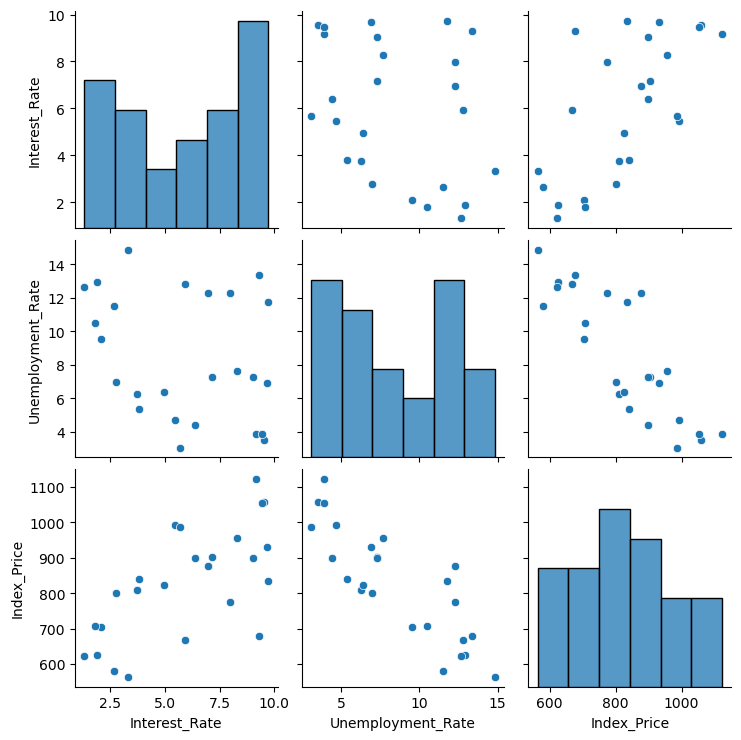

In [5]:
# making some visualizations
sns.pairplot(data=df)

In [6]:
df.corr()

,Interest_Rate,Unemployment_Rate,Index_Price
Interest_Rate,1.000000,-0.299433,0.666304
Unemployment_Rate,-0.299433,1.000000,-0.841626
Index_Price,0.666304,-0.841626,1.000000


Text(0, 0.5, 'Index Price')

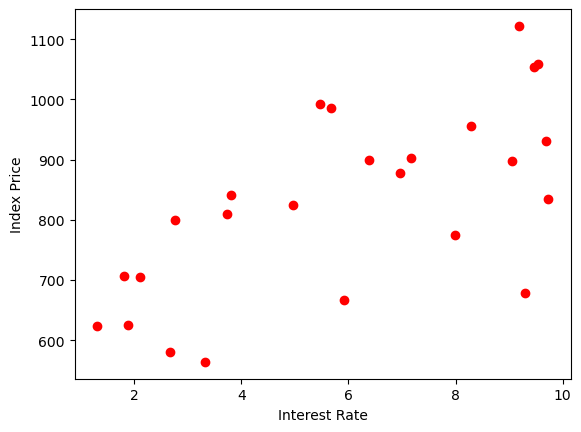

In [12]:
# Visualize the data a bit more
plt.scatter(x=df['Interest_Rate'],y=df['Index_Price'],color='r')
plt.xlabel('Interest Rate')
plt.ylabel('Index Price')

In [13]:
# splitting into independent and dependent features
X=df.drop(columns=['Index_Price'],axis=1)
y=df['Index_Price']

In [14]:
X.head()

,Interest_Rate,Unemployment_Rate
0,9.54,3.54
1,9.69,6.90
2,8.28,7.66
3,3.74,6.26
4,1.88,12.94


In [15]:
y.head()

0    1058
1     931
2     956
3     810
4     626
Name: Index_Price, dtype: int64

In [16]:
# train, test, split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.25)

<Axes: xlabel='Interest_Rate', ylabel='Unemployment_Rate'>

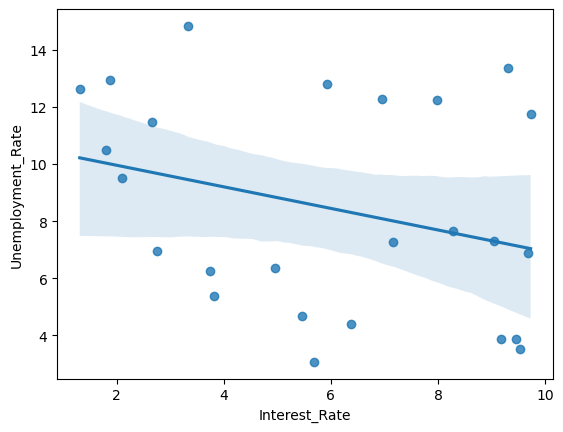

In [25]:
sns.regplot(x=df['Interest_Rate'],y=df['Unemployment_Rate'])

<Axes: xlabel='Unemployment_Rate', ylabel='Index_Price'>

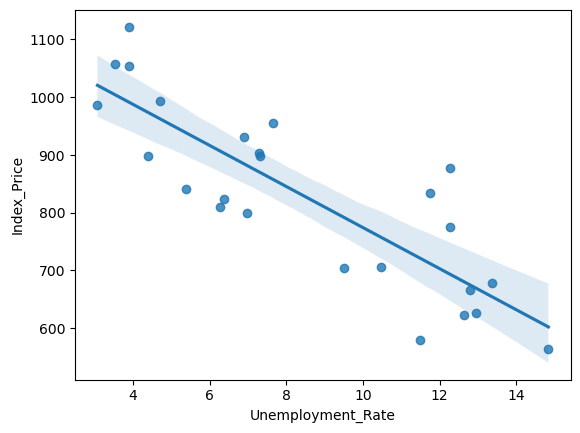

In [24]:
sns.regplot(x=df['Unemployment_Rate'],y=df['Index_Price'])

<Axes: xlabel='Index_Price', ylabel='Interest_Rate'>

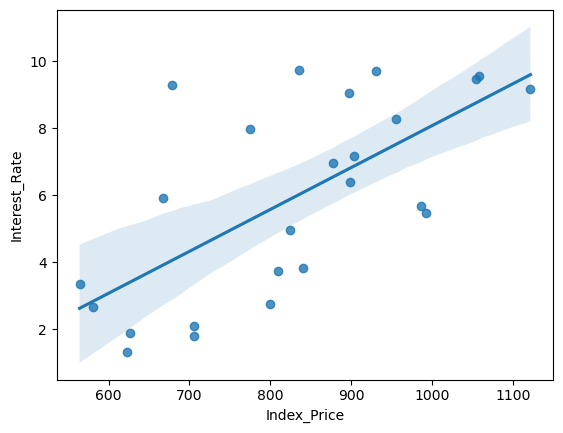

In [26]:
sns.regplot(x=df['Index_Price'],y=df['Interest_Rate'])

In [27]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

In [28]:
X_train

array([[ 0.71902139, -0.44205671],
       [-1.27648489,  0.62371536],
       [ 0.6124997 ,  0.84133374],
       [-1.58184706,  0.34471744],
       [ 1.23387622,  0.6990448 ],
       [-0.11894922,  0.98920265],
       [ 0.25032597,  0.84412372],
       [ 1.16641248, -1.59152817],
       [-1.47532538,  0.07408945],
       [-1.55344128,  1.03105233],
       [ 1.1380067 , -1.49387889],
       [ 0.04438404, -1.35437993],
       [-0.28228247, -1.27068055],
       [ 0.32134042, -0.54807593],
       [ 1.21967332, -0.65409514],
       [ 1.08119513,  1.14823146],
       [-1.03858646,  1.56114839],
       [-0.45981862, -0.80196404]])

In [30]:
from sklearn.linear_model import LinearRegression

regression=LinearRegression()
regression.fit(X_train,y_train)

LinearRegression()

In [32]:
from sklearn.model_selection import cross_val_score

validation_score=cross_val_score(regression, X_train, y_train, scoring='neg_mean_squared_error', cv=3)

In [36]:
mean_validation_score=np.mean(validation_score)
mean_validation_score

np.float64(-4571.214290534259)

In [37]:
# predicting on test data

y_pred=regression.predict(X_test)

In [38]:
y_pred

array([1005.71115874,  741.11755831,  824.50370895,  953.7455559 ,
        790.36376753,  876.73806184,  498.04241095])

In [39]:
# performance meteics
from sklearn.metrics import mean_squared_error, mean_absolute_error, root_mean_squared_error
mse=mean_squared_error(y_test, y_pred)      # mse is a bit high as there are a bit of outliers in the dataset
mae=mean_absolute_error(y_test, y_pred)
rmse=root_mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error={mse}\nMean Absolute Error={mae}\nRoot Mean Squared Error={rmse}")

Mean Squared Error=4964.966289189139
Mean Absolute Error=55.68253968253966
Root Mean Squared Error=70.46251690926985


In [40]:
from sklearn.metrics import r2_score
print(f"Root Squared (R2) Score={r2_score(y_test,y_pred)}")

Root Squared (R2) Score=0.765296926780491


<Axes: ylabel='Index_Price'>

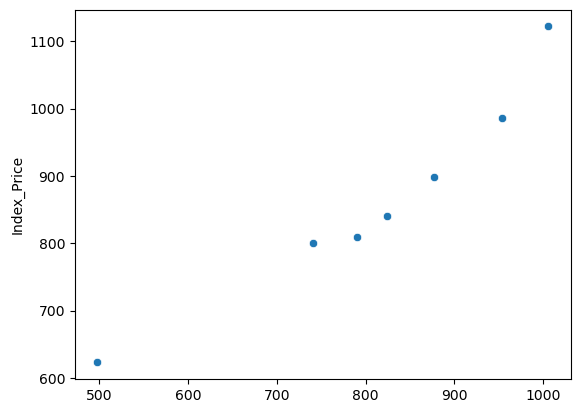

In [46]:
# Assumptions

sns.scatterplot(x=y_pred, y=y_test)     # considered good if it follows a line like sequence

In [42]:
residuals=y_test-y_pred
residuals

10    116.288841
24     58.882442
13     16.496291
14     32.254444
3      19.636232
20     21.261938
9     124.957589
Name: Index_Price, dtype: float64

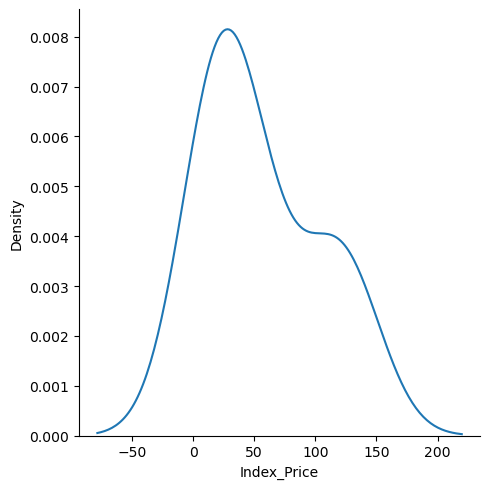

In [ ]:
# plotting the residuals

sns.displot(data=residuals, kind='kde')   # considered good if it follows a bell curve sequence

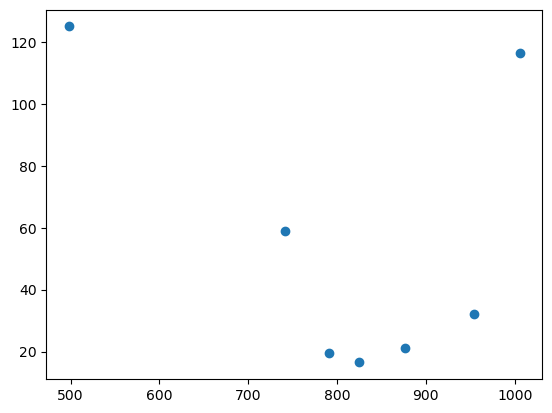

In [47]:
# Scatter Plot with respect to prediction and residuals
plt.scatter(y_pred, residuals)      # considered good if it is unifirmly distributed (scattered all over the graph)

In [48]:
# OLS Linear Regression
import statsmodels.api as sm

model=sm.OLS(y_train,X_train).fit()
prediction=model.predict(X_test)

print(prediction)

print(model.summary())

[ 192.82226985  -71.77133058   11.61482006  140.85666702  -22.52512136
   63.84917295 -314.84647794]
                                 OLS Regression Results                                
Dep. Variable:            Index_Price   R-squared (uncentered):                   0.030
Model:                            OLS   Adj. R-squared (uncentered):             -0.091
Method:                 Least Squares   F-statistic:                             0.2484
Date:                Sat, 12 Apr 2025   Prob (F-statistic):                       0.783
Time:                        10:58:37   Log-Likelihood:                         -146.19
No. Observations:                  18   AIC:                                      296.4
Df Residuals:                      16   BIC:                                      298.2
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 co

/opt/miniconda3/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=18 observations were given.
  return hypotest_fun_in(*args, **kwds)


In [51]:
regression.coef_

array([  66.42521637, -106.59073543])

In [52]:
regression.intercept_

np.float64(812.8888888888889)